In [1]:
# Load Data
import pandas as pd

DATA_PATH = './clothes_dataset/'

train_df = pd.read_csv(DATA_PATH+ 'train.csv')
val_df = pd.read_csv(DATA_PATH+ 'val.csv')
test_df = pd.read_csv(DATA_PATH+ 'test.csv')
del train_df["Unnamed: 0"]
del val_df["Unnamed: 0"]
del test_df["Unnamed: 0"]
train_df["image"] = [DATA_PATH + x for x in train_df["image"]]
val_df["image"] = [DATA_PATH + x for x in val_df["image"]]
test_df["image"] = [DATA_PATH + x for x in test_df["image"]]
train_df

,image,black,blue,brown,green,red,white,dress,shirt,pants,shorts,shoes
0,./clothes_dataset/./clothes_dataset\blue_short...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,./clothes_dataset/./clothes_dataset\red_pants\...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,./clothes_dataset/./clothes_dataset\green_pant...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,./clothes_dataset/./clothes_dataset\brown_shor...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,./clothes_dataset/./clothes_dataset\white_dres...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5573,./clothes_dataset/./clothes_dataset\black_shoe...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5574,./clothes_dataset/./clothes_dataset\white_shoe...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
5575,./clothes_dataset/./clothes_dataset\black_pant...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5576,./clothes_dataset/./clothes_dataset\green_shoe...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [2]:
# 이미지 제너레이터 정의 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen =ImageDataGenerator(rescale=1./255)
def get_steps(num_samples,batch_size) :
    if (num_samples % batch_size) > 0 :
        return (num_samples // batch_size) + 1
    else :
        return num_samples // batch_size

#  CREATE MODEL
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

model = Sequential()
model.add(Flatten(input_shape=(112,112,3))) # -> 112*112*3
model.add(Dense(128,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(11,activation="sigmoid")) 
# 다중 레이블 문제는 activation function = sigmoid , loss = binary_crossentropy 사용!!!!!!!!!!
# softmax는 가장 높은 확률의 클래스만 강조하기에 부적합

model.compile(optimizer = "adam",
             loss="binary_crossentropy",
             metrics=['acc'])

In [3]:
# DataFrame 을 활용하여 학습을 진행 할 수 이도록 케라스에서 flow from DataFrame 지원
# 데이터 제네레이터 정의
batch_size = 32
class_col =['black','blue','brown','green','red','white','dress','shirt','pants','shorts','shoes']

# Make Generator
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory='',
    x_col = 'image',
    y_col = class_col,
    target_size=(112,112),
    color_mode='rgb',
    class_mode='raw', #other 
    batch_size=batch_size,
    seed=42)

val_generator=val_datagen.flow_from_dataframe( 
    dataframe=val_df,
    directory='',
    x_col = 'image',
    y_col = class_col,
    target_size=(112,112),
    color_mode='rgb',
    class_mode='raw', # other
    batch_size=batch_size,
    shuffle=True
)
test_generator=test_datagen.flow_from_dataframe(
    dataframe=test_df,
    directory='',
    x_col = 'image',
    y_col = class_col,
    target_size=(112,112),
    color_mode='rgb',
    class_mode='raw', # other
    batch_size=batch_size,
    shuffle=True
)

Found 5578 validated image filenames.
Found 2391 validated image filenames.
Found 3416 validated image filenames.


In [13]:
#모델 학습
model.fit(train_generator,
          steps_per_epoch=get_steps(len(train_df),batch_size),
          validation_data = val_generator,
          validation_steps = get_steps(len(val_df),batch_size),
          epochs=30)

Epoch 1/30
175/175 [==============================] - 17s 94ms/step - loss: 0.1559 - acc: 0.5898 - val_loss: 0.2120 - val_acc: 0.6269
Epoch 2/30
175/175 [==============================] - 16s 92ms/step - loss: 0.1584 - acc: 0.5911 - val_loss: 0.2053 - val_acc: 0.6027
Epoch 3/30
175/175 [==============================] - 16s 91ms/step - loss: 0.1481 - acc: 0.6045 - val_loss: 0.2152 - val_acc: 0.6161
Epoch 4/30
175/175 [==============================] - 16s 92ms/step - loss: 0.1657 - acc: 0.5844 - val_loss: 0.2305 - val_acc: 0.5650
Epoch 5/30
175/175 [==============================] - 16s 92ms/step - loss: 0.1360 - acc: 0.6219 - val_loss: 0.1750 - val_acc: 0.6073
Epoch 6/30
175/175 [==============================] - 16s 92ms/step - loss: 0.1401 - acc: 0.6009 - val_loss: 0.2163 - val_acc: 0.5634
Epoch 7/30
175/175 [==============================] - 17s 96ms/step - loss: 0.1371 - acc: 0.6178 - val_loss: 0.1858 - val_acc: 0.6721
Epoch 8/30
175/175 [==============================] - 16s 93ms

107/107 [==============================] - 5s 49ms/step


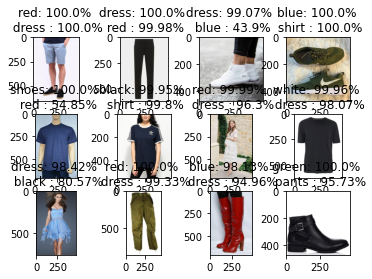

In [21]:
#데이터 예측
import matplotlib.pyplot as plt
import cv2
preds = model.predict(test_generator,
                     steps = get_steps(len(test_df), batch_size),
                     verbose = 1)
do_preds = preds[:12]
for i,pred in enumerate(do_preds) :
    plt.subplot(3,4,i+1)
    prob =zip(class_col,list(pred))
    prob= sorted(list(prob),key=lambda z: z[1],reverse =True)[:2]
    
    image= cv2.imread(test_df["image"][i])
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    
    plt.imshow(image)
    plt.title(f'{prob[0][0]}: {round(prob[0][1]*100,2)}% \n {prob[1][0]} : {round(prob[1][1]*100,2)}%')

    
plt.show()
